In [1]:
import seaborn as sns

In [2]:
# Standard packages
import numpy as np
import pandas as pd
import matplotlib as mtp
import matplotlib.pyplot as plt

In [3]:
# Plot in notebook
% matplotlib inline

# **Histogram**

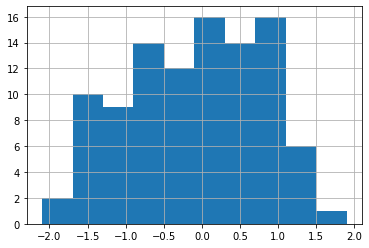

In [4]:
values = np.random.randn(100)
plt.hist(values)
plt.grid()

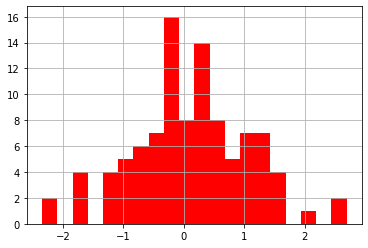

In [5]:
values_1 = np.random.randn(100)
plt.hist(values_1, color='red', bins=20)
plt.grid()

We can also visualize both these in a single graph

(array([ 2.,  4.,  9., 13., 24., 22., 12., 11.,  1.,  2.]),
 array([-2.3420951 , -1.83861475, -1.3351344 , -0.83165405, -0.3281737 ,
         0.17530665,  0.678787  ,  1.18226734,  1.68574769,  2.18922804,
         2.69270839]),
 <a list of 10 Patch objects>)

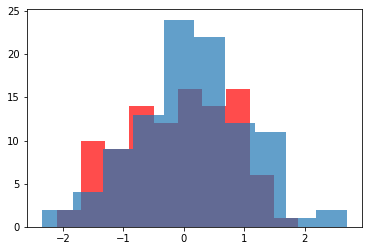

In [6]:
plt.hist(values, color='r', alpha = 0.7)
plt.hist(values_1, alpha = 0.7)

Joint Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


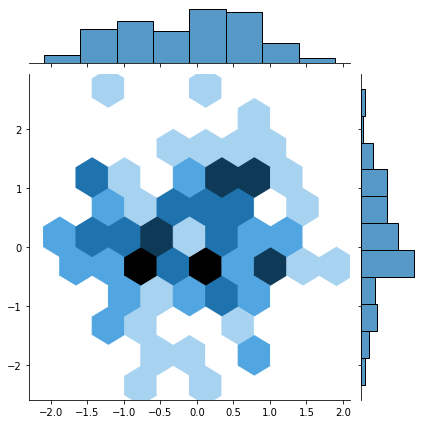

In [7]:
sns.jointplot(values, values_1, kind='hex')

# **Kernel Density Estimate Plots**

*Rug Plot: A rug plot is a plot of data for a single quantitative variable, displayed as marks along an axis* 

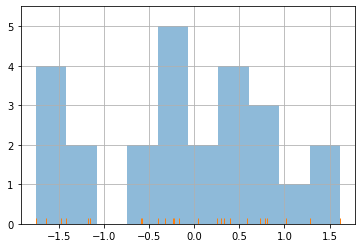

In [8]:
short_values = np.random.randn(25)
plt.hist(short_values, alpha = 0.5)
sns.rugplot(short_values)
plt.grid()

*Kernal Density Estimate PLots: In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.*

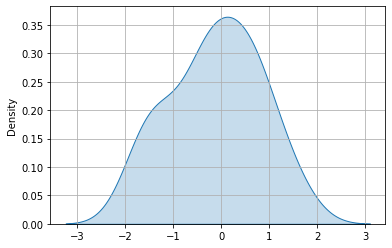

In [9]:
sns.kdeplot(short_values, shade=True)
plt.grid()

Joint Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


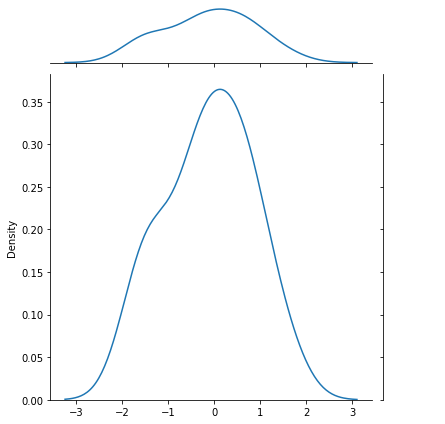

In [10]:
sns.jointplot(short_values, kind='kde')

# **Combining Plot Styles**

We can combine plots using the distplot function in seaborn. It normally has a histograph with kernal density plot. But then we can customize what we want.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


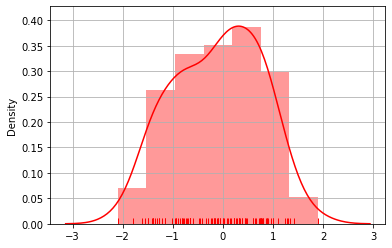

In [11]:
sns.distplot(values, rug=True, color='r')
plt.grid()

We can individualy control the parameters of distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


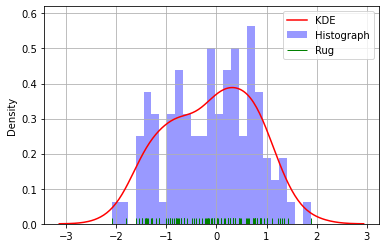

In [12]:
sns.distplot(values, bins=25, rug=True, hist_kws={'color': 'blue', 'label': 'Histograph'},
             kde_kws={'color': 'red', 'label': 'KDE'},
             rug_kws={'color': 'green', 'label': 'Rug'})
plt.legend()
plt.grid()

We can also use pandas series instead of numpy array. The pandas work very well with the seaborn package.

# **Box Plot and Violin Plot**

*A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). ... It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.*

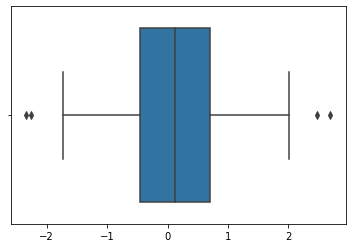

In [24]:
sns.boxplot(x=values_1)

Here there are outliers which are not included in the whiskers. We can add them in the plot.

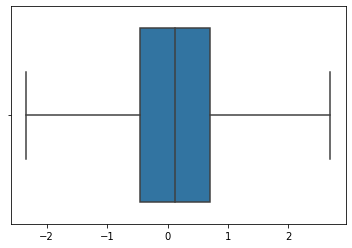

In [26]:
sns.boxplot(x=values_1, whis=np.inf)

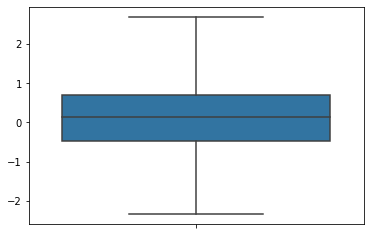

In [35]:
sns.boxplot(y=values_1, whis=np.inf)

*In general, violin plots are a method of plotting numeric data and can be considered a combination of the box plot with a kernel density plot. In the violin plot, we can find the same information as in the box plots.*


*The unquestionable advantage of the violin plot over the box plot is that aside from showing the abovementioned statistics it also shows the entire distribution of the data. This is of interest, especially when dealing with multimodal data, i.e., a distribution with more than one peak.*

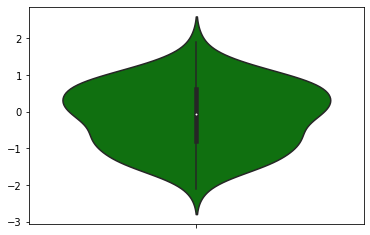

In [37]:
sns.violinplot(y=values, color='g')

Now let us see the same for a gamma distribution.

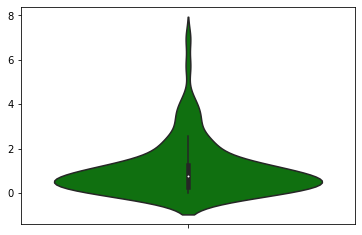

In [54]:
gamma_1 = np.random.gamma(1, 1, 100)
sns.violinplot(y=gamma_1, color='g')

We can see the inner datapoints as  well

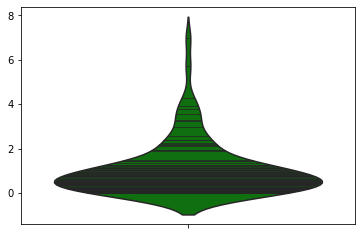

In [59]:
sns.violinplot(y=gamma_1, color='g', inner='stick')

# **Regression Plots**

In [61]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Linear Regression plots

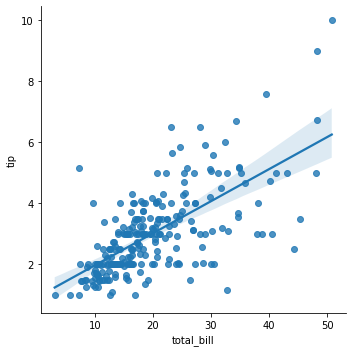

In [69]:
sns.lmplot(x='total_bill', y='tip', data=tips)

We can cutomize each scatter and line units using dictionary

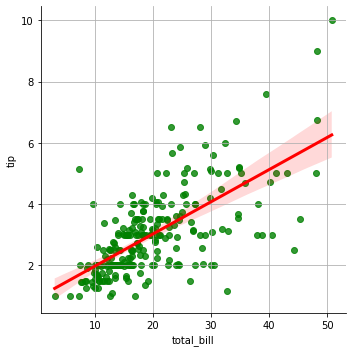

In [81]:
sns.lmplot(x='total_bill', y='tip', data=tips,
           scatter_kws={'color': 'green'},
           line_kws={'color':'red', 'linewidth':3})
plt.grid()

If we don't want a linear fit, we can change it by changing the order

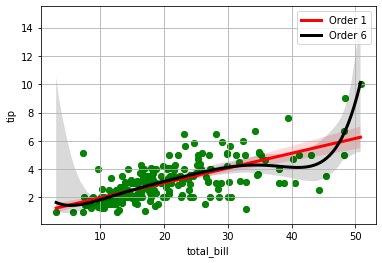

In [143]:
fig, ax = plt.subplots()
sns.regplot(x='total_bill', y='tip', data=tips, order=1, ax=ax,
           scatter_kws={'color': 'green'},
           line_kws={'color':'red', 'linewidth':3, 'label': 'Order 1'})
sns.regplot(x='total_bill', y='tip', data=tips, order=6, ax=ax,
           scatter_kws={'color': 'green'},
           line_kws={'color':'black', 'linewidth':3, 'label':'Order 6'})
plt.grid()
plt.legend()

Here we have used reg plot to visualize both the graphs in a single figure. This is not possible in lmplot.

With increasing the order, the graph shapes  with the data points.

In [106]:
tips['tip_percentage'] = (tips['tip'] / tips['total_bill']) * 100
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


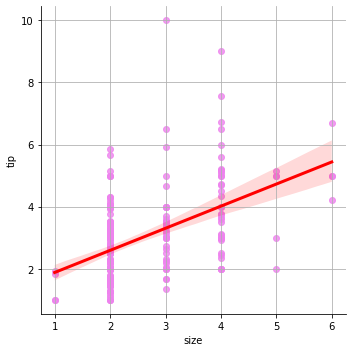

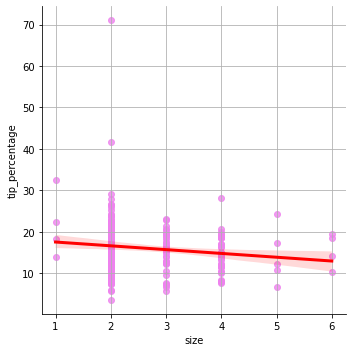

In [121]:
sns.lmplot(x='size', y='tip', data=tips,
           scatter_kws={'color': 'violet'},
           line_kws={'color':'red', 'linewidth':3})
plt.grid()
sns.lmplot(x='size', y='tip_percentage', data=tips,
           scatter_kws={'color': 'violet'},
           line_kws={'color':'red', 'linewidth':3})
plt.grid()

*Jitter: The deviation from true periodicity*

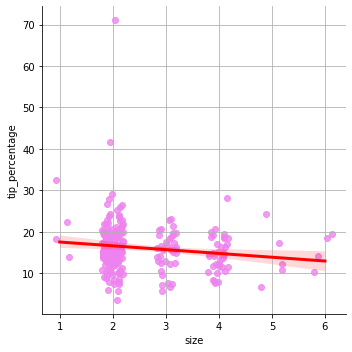

In [119]:
sns.lmplot(x='size', y='tip_percentage', data=tips, x_jitter=0.2,
           scatter_kws={'color': 'violet'},
           line_kws={'color':'red', 'linewidth':3})
plt.grid()

This helps in visualizing the plot more clealy

We can use the mean too see if the linear model passes through the mean of the data points.

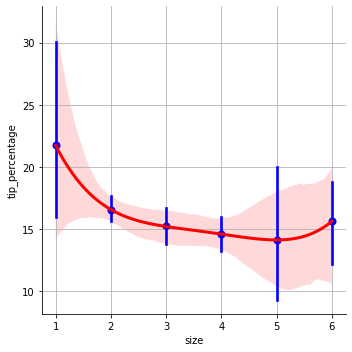

In [127]:
sns.lmplot(x='size', y='tip_percentage', data=tips, x_estimator=np.mean, order=4,
           scatter_kws={'color': 'blue'},
           line_kws={'color':'red', 'linewidth':3})
plt.grid()

Visualizing more than two dimensions using 'hue'

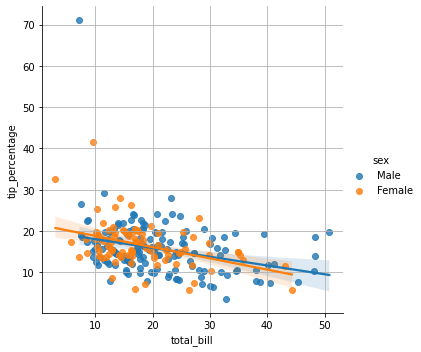

In [140]:
sns.lmplot(x='total_bill', y='tip_percentage', data=tips, hue='sex')
plt.grid()

Sharing the same y axis using reg plot

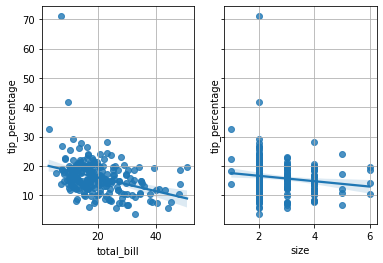

In [157]:
fig, axis = plt.subplots(1, 2, sharey=True)

sns.regplot(x='total_bill', y='tip_percentage', data=tips, ax=axis[0])
sns.regplot(x='size', y='tip_percentage', data=tips, ax=axis[1])
axis[0].grid()
axis[1].grid()